1. OpenCV Haar Cascade construction for face and eyes detection

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
face_casc= cv2.CascadeClassifier("./data/haarcascade_frontalface_default.xml")
eye_casc = cv2.CascadeClassifier("./data/haarcascade_eye.xml")

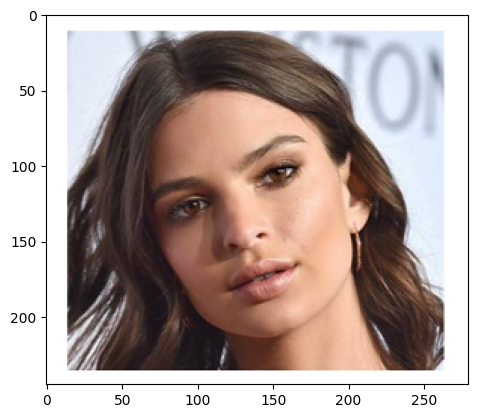

In [3]:
face_img = cv2.imread("./data/Actress.png")

face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)

plt.imshow(face_img)
plt.show()

Face image bounding box processing : Only in gray scale for Cascade!

[[ 49  48 161 161]]
face object detection loc :  49 48 161 161


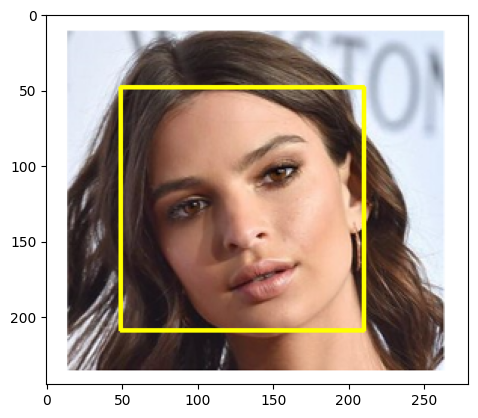

In [4]:
face_gray_img = cv2.cvtColor(face_img, cv2.COLOR_RGB2GRAY)
face_img_copied = face_img.copy()

faces_box_info = face_casc.detectMultiScale(face_gray_img, 1.1, 4)
print(faces_box_info)
x_, y_, w_, h_ = 0, 0, 0, 0
for(x,y,w,h) in faces_box_info:
    print("face object detection loc : ", x,y, w, h)
    x_, y_, w_, h_ = x, y, w, h
    cv2.rectangle(face_img_copied, (x,y), (x+w, y+h), color=(255, 255, 0), thickness=2)

plt.imshow(face_img_copied)
plt.show()

Eye detection

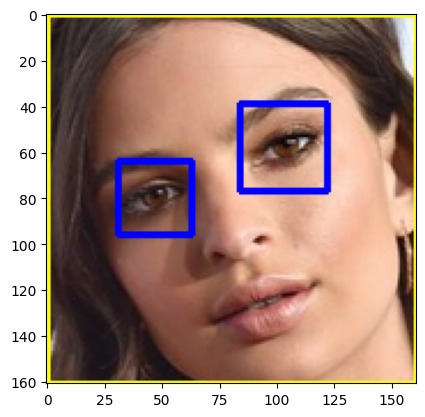

In [5]:
roi_gray = face_gray_img[y_:(y_+h_), x_:(x_+w_)]
roi_color = face_img_copied[y_:(y_+h_), x_:(x_+w_)]

eyes = eye_casc.detectMultiScale(roi_gray, 1.1, 4)
idx =0

for(x,y,w,h) in eyes:
    if idx == 0:
        eye_1 = (x, y, w, h)
        idx +=1 
    elif idx == 1:
        eye_2 = (x, y, w, h)

    cv2.rectangle(roi_color, (x,y), (x+w, y+h),thickness=2, color=(0, 0, 255))

plt.imshow(roi_color)
plt.show()

In [6]:
print(eye_1[0] , eye_2[0])

if eye_1[0] < eye_2[0]:
    left_eye = eye_1
    right_eye = eye_2
else:
    left_eye = eye_2
    right_eye = eye_1

print(left_eye, right_eye)

31 84
(31, 64, 32, 32) (84, 39, 38, 38)


In [7]:
left_center = (int(left_eye[0] + left_eye[2]/2), int(left_eye[1] + left_eye[3]/2))
left_cx = left_center[0]
left_cy = left_center[1]

print(left_cx, left_cy)

right_center = (int(right_eye[0] + right_eye[2]/2), int(right_eye[1] + right_eye[3]/2))
right_cx = right_center[0]
right_cy = right_center[1]

print(right_cx, right_cy)

47 80
103 58


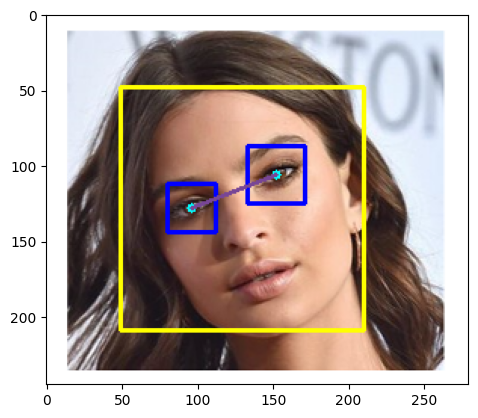

In [8]:
cv2.circle(roi_color, left_center, 3, (0, 255, 255), -1)
cv2.circle(roi_color, right_center, 3, (0, 255, 255), -1)
cv2.line(roi_color, left_center, right_center, (120, 70, 150), 2)

plt.imshow(face_img_copied)
plt.show()


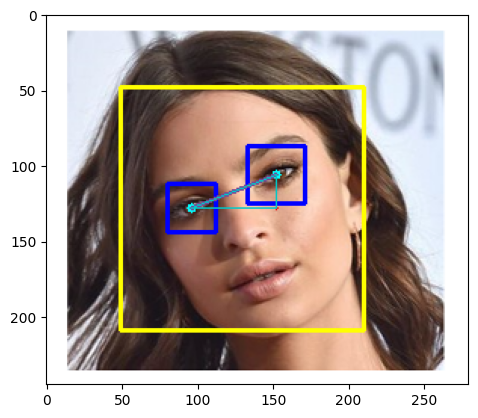

In [9]:
if left_cy > right_cy:
    A = (right_cx, left_cy)
    direction = -1

else :
    A=(left_cx, right_cy)
    direction = 1

cv2.circle(roi_color, A, 1, (255, 0, 0), -1)
cv2.line(roi_color, right_center, left_center, (0, 200, 200), 1)
cv2.line(roi_color, left_center, A, (0, 200, 200), 1)
cv2.line(roi_color, right_center,A,(0, 200, 200), 1)

plt.imshow(face_img_copied)
plt.show()

In [10]:
delta_x = right_cx - left_cx
delta_y = right_cy- left_cy

angle = np.arctan(delta_y/delta_x)
angle_degree = angle*180/np.pi
print(angle_degree)

-21.447736327105353


245 280
(140, 122)
[[  0.93075149  -0.36565237  54.30438035]
 [  0.36565237   0.93075149 -42.74301434]]


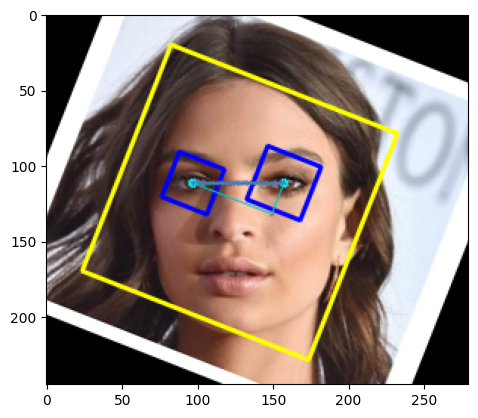

In [11]:
h, w, _ = face_img_copied.shape
print(h,w)
img_center = (w//2, h//2)
print(img_center)

M=cv2.getRotationMatrix2D(img_center, angle_degree, 1.0)
print(M)
rotated = cv2.warpAffine(face_img_copied, M, (w, h))

plt.imshow(rotated)
plt.show()

In [12]:
cap=cv2.VideoCapture("./data/blooms-113004.mp4")

w = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
h = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)

print(f"OG w & h : {w}x{h}")
print(f"fps:{fps}")
print(f"frame count : {frame_count}")



OG w & h : 1920.0x1080.0
fps:29.97002997002997
frame count : 751.0


In [13]:
if cap.isOpened():
    print("check init")
    while True:
        ret, frame = cap.read() #read next fr
        if not ret: #fail to read fr
            break
        frame = cv2.resize(frame, (640, 480))
        cv2.imshow("video test", frame)
        if cv2.waitKey(25) & 0xFF == ord("q"):
            exit()

else:
    print("failed to init obj")

check init
